In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3
%matplotlib inline

In [27]:
#import df
con = sqlite3.connect('twitter_hate.db')
with sqlite3.connect('twitter_hate.db') as con:
    df = pd.read_sql_query("SELECT * FROM tweets_nlp", con)

In [28]:
df

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens
0,17,3,1,2,0,1,""" bitch who do you love """,""" bitch who do you love """,""" bitch who do -PRON- love """,bitch,,love,bitch love,7.0
1,23,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#1...",""" fuck no that bitch dont even suck dick "" &#;...",""" fuck no that bitch do not even suck dick "" &...",bitch dick # kermit video,,suck bout fuck,bitch dick # kermit video suck bout fuck,28.0
2,38,3,0,2,1,1,""" lames crying over hoes thats tears of a clown """,""" lames crying over hoes thats tears of a clown """,""" lame cry over hoe that s tear of a clown """,lame hoe tear clown,,cry s,lame hoe tear clown cry s,12.0
3,59,3,0,3,0,1,"""..All I wanna do is get money and fuck model ...","""..all i wanna do is get money and fuck model ...",""" .. all i wanna do be get money and fuck mode...",wanna money fuck model bitch russell simmon,,,wanna money fuck model bitch russell simmon,18.0
4,62,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...","""mentionhere: females think dating a pussy is ...",""" mentionhere : female think date a pussy be c...",mentionhere female pussy stuff pussy,,think date do make,mentionhere female pussy stuff pussy think dat...,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,24771,3,0,3,0,1,you look like your 12 stop talking about fucki...,you look like your stop talking about fucking...,-PRON- look like -PRON- stop talk about fuck...,bitch,,look stop talk fuck,bitch look stop talk fuck,13.0
2856,24776,3,3,0,0,0,you're all niggers,you're all niggers,-PRON- be all nigger,nigger,,,nigger,4.0
2857,24777,3,2,1,0,0,you're such a retard i hope you get type 2 dia...,you're such a retard i hope you get type diab...,-PRON- be such a retard i hope -PRON- get type...,retard type diabete sugar rush faggot mentionhere,,hope get die fuck,retard type diabete sugar rush faggot mentionh...,22.0
2858,24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like i ain...,young buck wanna eat ! ! .. dat nigguh like i ...,young buck wanna dat fuckin,,eat be,young buck wanna dat fuckin eat be,17.0


In [29]:
df.iloc[2827]['tweet_lemma']

'tear & # ; mentionhere : hashtaghere rt mentionhere mentionhere do not call -PRON- sweetie -PRON- fucking retard & # ;'

In [30]:
#remove mentions, urls, hashtags, ;&, and 'rt'. keep a count of mentions, urls, hashtags and other punctuation
tweets = df['tweet_clean']

mentions = []
urls = []
hashtags = []
i = 0
for tweet in tweets:
    tweet = tweet.split()
    mentions.append(tweet.count('mentionhere')+tweet.count('mentionhere:')+tweet.count('"mentionhere:')+tweet.count('&#;mentionhere:'))
    urls.append(tweet.count('urlhere'))
    hashtags.append(tweet.count('hashtaghere'))
    tweet = [token for token in tweet if token not in [';&','']]
    tweet = [token for token in tweet if token not in ['&#;mentionhere:','mentionhere:','"mentionhere:','mentionhere', 'urlhere', 'hashtaghere', 'rt', 'amp']]
    tweet = " ".join(tweet)
    tweets[i] = tweet
    i += 1
    
df['tweet_no_others'] = tweets
df['mention_count'] = mentions
df['url_count'] = urls
df['hashtag_count'] = hashtags

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [31]:
df.iloc[2827]['tweet_clean']

"tears don't call me sweetie you fucking retard&#;"

In [32]:
sum(count > 0 for count in mentions)

1690

In [33]:
sum(count > 0 for count in urls)

215

In [34]:
sum(count > 0 for count in hashtags)

191

In [35]:
#just to check, find tweets with at least one of each count
mention_bool = df['mention_count'] > 0
url_bool = df['url_count'] > 0
hashtag_bool = df['hashtag_count'] > 0

df[mention_bool & url_bool | mention_bool & hashtag_bool | url_bool & hashtag_bool]

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens,tweet_no_others,mention_count,url_count,hashtag_count
9,92,3,1,2,0,1,"""@CaelanG15: ""@22EdHam: @CaelanG15 that nigga ...","that nigga was eating that hoe lol"" hell yea l...",""" mentionhere : "" mentionhere : mentionhere th...",mentionhere mentionhere mentionhere nigga hoe ...,,eat say,mentionhere mentionhere mentionhere nigga hoe ...,27.0,"that nigga was eating that hoe lol"" hell yea l...",3,1,0
12,110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...","you're fucking gay, blacklisted hoe"" holding o...",""" mentionhere : mentionhere -PRON- be fuck gay...",mentionhere mentionhere,,fuck blacklist hold,mentionhere mentionhere fuck blacklist hold,18.0,"you're fucking gay, blacklisted hoe"" holding o...",2,1,1
25,260,3,2,1,0,0,"""@TheoMaxximus: #GerrysHalloweenParty http://t...","urlhere"" halloween was yesterday stupid nigger",""" mentionhere : hashtaghere urlhere "" hallowee...",mentionhere halloween yesterday nigger,,,mentionhere halloween yesterday nigger,11.0,"urlhere"" halloween was yesterday stupid nigger",1,0,1
32,334,3,0,3,0,1,"""@hazelebaby: Karma is a bitch #Damn #GodProte...","karma is a bitch &#;"" *sips tea*",""" mentionhere : karma be a bitch hashtaghere h...",mentionhere karma bitch tea,,sip,mentionhere karma bitch tea sip,17.0,"karma is a bitch &#;"" *sips tea*",1,0,2
45,495,3,1,2,0,1,"""I'm a funky ass honkey."" - @jtimberlake 's sh...","""i'm a funky ass honkey."" - 's shout out to to...",""" -PRON- be a funky ass honkey . "" - mentionhe...",ass honkey mentionhere shout tonight cabaret,,mentionhere,ass honkey mentionhere shout tonight cabaret m...,25.0,"""i'm a funky ass honkey."" - 's shout out to to...",2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,23735,3,0,3,0,1,damn @liltwist @diplo @LilTunechi &amp; @chris...,"damn &amp; ""flowers for the ladies &amp; dick ...",damn mentionhere mentionhere mentionhere & amp...,mentionhere mentionhere mentionhere amp mentio...,,,mentionhere mentionhere mentionhere amp mentio...,24.0,"damn &amp; ""flowers for the ladies &amp; dick ...",4,1,1
2769,23897,3,2,1,0,0,harm this pussy instead RT @ABC7: missing 26-y...,harm this pussy instead missing -yr-old usc me...,harm this pussy instead rt mentionhere : miss ...,pussy mentionhere student tuesday,,harm rt miss see may harm,pussy mentionhere student tuesday harm rt miss...,21.0,harm this pussy instead missing -yr-old usc me...,1,1,0
2787,24179,3,0,3,0,1,lol RT @_mykall: when you @ bae game &amp; an ...,lol when you @ bae game &amp; an unknown hoe s...,lol rt mentionhere : when -PRON- @ bae game & ...,lol rt mentionhere bae game amp hoe name loud ...,,scream,lol rt mentionhere bae game amp hoe name loud ...,27.0,lol when you @ bae game &amp; an unknown hoe s...,1,1,0
2804,24314,3,2,1,0,0,omg RT @SaddyBey: Fat bitch. What's her @? htt...,omg fat bitch. what's her @?,omg rt mentionhere : fat bitch . what be -PRON...,rt mentionhere fat bitch,,,rt mentionhere fat bitch,13.0,omg fat bitch. what's her @?,1,1,0


I think more work needs to be done to ensure cleaning is correct but I will write the code for tfidf and ngrams below

In [36]:
corpus = df['tweet_no_others']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

ngram = CountVectorizer(ngram_range=(2,2))
ngram_matrix = ngram.fit_transform(corpus)

ngram_matrix = ngram_matrix.toarray()
vocab = ngram.get_feature_names()
ngrams_df = pd.DataFrame(ngram_matrix, columns=vocab)
ngrams_df

,aa lol,aaaaaaaaand it,aap is,aaron had,aaronmacgruder stuff,ab it,ability to,abortion you,about act,about after,...,zimmerman arrested,zimmerman as,zimmerman jury,zimmerman we,zimmy attack,zionist is,zoe ask,zog or,zone radius,zoom in
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ngrams_df['class'] = df['class']

In [40]:
ngrams_offensive = ngrams_df[ngrams_df['class'] == 1]
ngrams_hate = ngrams_df[ngrams_df['class'] == 0]
ngrams_offensive = ngrams_offensive.drop('class', axis='columns')
ngrams_hate = ngrams_hate.drop('class', axis='columns')

<AxesSubplot:>

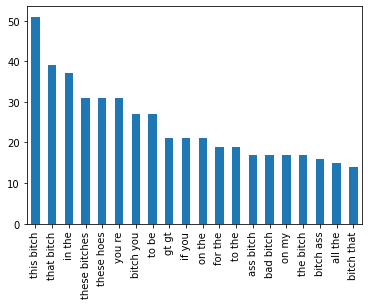

In [50]:
ng_count_off=ngrams_offensive.sum()
ng_off_largest = ng_count_off.nlargest(20)
ng_off_largest.plot(kind='bar')

<AxesSubplot:>

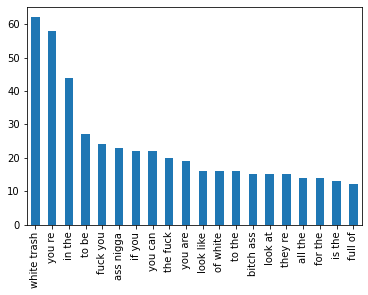

In [49]:
ng_count_hate=ngrams_hate.sum()
ng_hate_largest = ng_count_hate.nlargest(20)
ng_hate_largest.plot(kind='bar')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidfv_matrix = tfidfv.fit_transform(corpus)
tfidfv_matrix = tfidfv_matrix.toarray()

vocab = tfidfv.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidfv_matrix, 2), columns=vocab)
tfidf_df

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,above,...,zimmerman,zimmy,zion,zionist,zipperheads,zoe,zog,zone,zoom,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
tfidf_df['class'] = df['class']

In [52]:
tfidf_offensive = tfidf_df[tfidf_df['class'] == 1]
tfidf_hate = tfidf_df[tfidf_df['class'] == 0]
tfidf_offensive = tfidf_offensive.drop('class', axis='columns')
tfidf_hate = tfidf_hate.drop('class', axis='columns')

<AxesSubplot:>

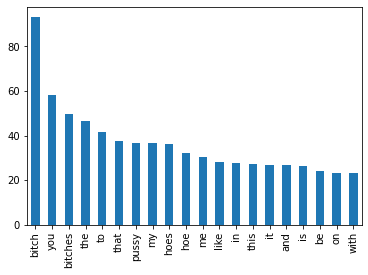

In [53]:
tf_count_off=tfidf_offensive.sum()
tf_off_largest = tf_count_off.nlargest(20)
tf_off_largest.plot(kind='bar')

<AxesSubplot:>

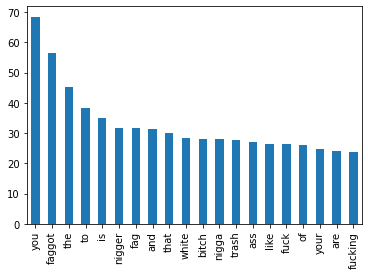

In [54]:
tf_count_hate=tfidf_hate.sum()
tf_hate_largest = tf_count_hate.nlargest(20)
tf_hate_largest.plot(kind='bar')